object
[0]précision de la Regression Logistique: 0.8105906313645621
Model de Logistic Regression
[[16 22]
 [ 1 84]]
Testing Accuracy = :  0.8130081300813008



[2024-05-03 18:36:10] Features: 10/1 -- score: 0.8086167800453514
[2024-05-03 18:36:11] Features: 9/1 -- score: 0.8086167800453514
[2024-05-03 18:36:11] Features: 8/1 -- score: 0.8086167800453514
[2024-05-03 18:36:11] Features: 7/1 -- score: 0.8086167800453514
[2024-05-03 18:36:11] Features: 6/1 -- score: 0.8086167800453514
[2024-05-03 18:36:11] Features: 5/1 -- score: 0.8086167800453514
[2024-05-03 18:36:11] Features: 4/1 -- score: 0.8086167800453514
[2024-05-03 18:36:11] Features: 3/1 -- score: 0.8086167800453514
[2024-05-03 18:36:11] Features: 2/1 -- score: 0.8086167800453514
[2024-05-03 18:36:11] Features: 1/1 -- score: 0.8086167800453514

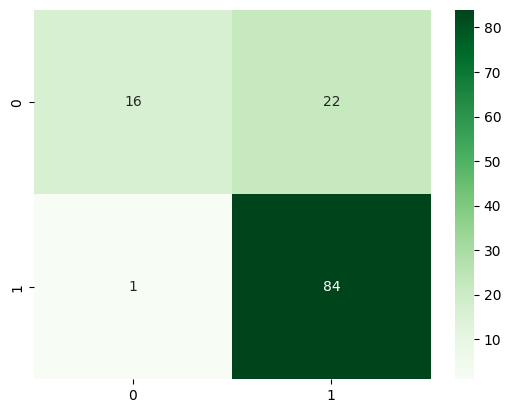

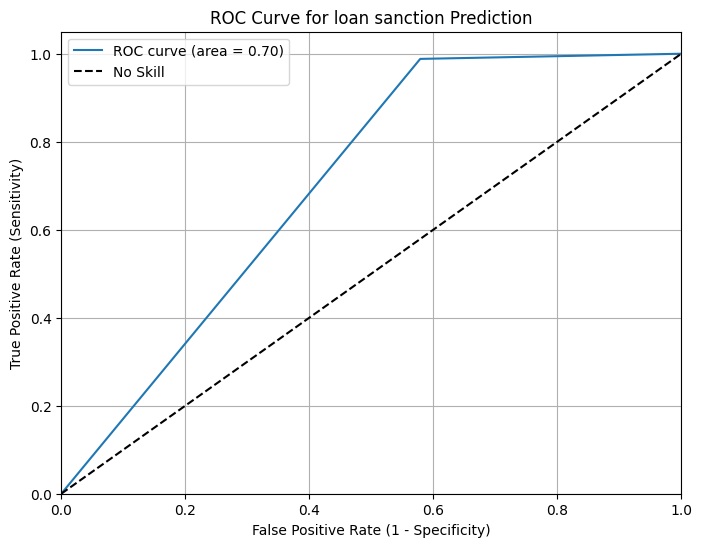

In [ ]:
#importation des données
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("/content/sample_data/loan_sanction_train.csv")
df.head()
#transformer les variables qualitatives en numérique
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
df.iloc[:,-1]=labelencoder_y.fit_transform(df.iloc[:,-1].values)
df.iloc[:,1]=labelencoder_y.fit_transform(df.iloc[:,1].values)
df.iloc[:,2]=labelencoder_y.fit_transform(df.iloc[:,2].values)
df.iloc[:,3]=labelencoder_y.fit_transform(df.iloc[:,3].values)
df.iloc[:,4]=labelencoder_y.fit_transform(df.iloc[:,4].values)
df.iloc[:,5]=labelencoder_y.fit_transform(df.iloc[:,5].values)
df.iloc[:,-2]=labelencoder_y.fit_transform(df.iloc[:,-2].values)

#traiter les valeurs manquantes
df.isnull().sum()
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median(),inplace=True)
df["Credit_History"].fillna(df["Credit_History"].median(),inplace=True)
df.isna().sum()

#creer une liste des variables indépendantes et une liste de la variable dépendate
X=df.iloc[:,1:12].values
Y=df.iloc[:,-1].values
#séparation des échantillons d'entrainement 80% contre de validation 20%
#appliquer l'échantillonage stratifié pour résoudre le problème diséquilibrage
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)
#standardiser liste des variables indépendantes
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
#appliquer le modèle de regression logistique
def models(X_train, Y_train):
   #Regression Logistique
   from sklearn. linear_model import LogisticRegression
   log=LogisticRegression(random_state = 0)
   log.fit(X_train, Y_train)
   #afficher les précisions des modèles
   print('[0]précision de la Regression Logistique:', log.score(X_train, Y_train))
   return log
#afficher la précision de notre modèle
print(Y_train.dtype)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
model=models(X_train,Y_train)
#afficher la matrice de confusion
le = LabelEncoder()
Y_test = le.fit_transform(Y_test)
from sklearn.metrics import confusion_matrix
print('Model de Logistic Regression')
cm = confusion_matrix(Y_test, model.predict(X_test))
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)
print( 'Testing Accuracy = : ',(TP + TN)/ (TP + TN + FN + FP))
sns.heatmap(cm,cmap="Greens",annot=True)
plt.savefig("confusion_matrix.png")
#selection des variables avec backward method
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector
bakward_feature_selector = SequentialFeatureSelector(LogisticRegression(),
                                                      k_features=1,
                                                      forward=False,
                                                      floating=False,
                                                      verbose=2,
                                                      scoring= "accuracy").fit(X_train, Y_train)
#afficher le graphe ROC
from sklearn.metrics import confusion_matrix, roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for loan sanction Prediction')
plt.legend()
plt.grid(True)
plt.savefig("ROC curve.png")